<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

# 결측치 처리

## 결측치 개념

* 누락되어 값이 존재하지 않고 비어있는 값을 의미한다. 

* 잘못된 값 입력.

* NA, 9999999, (공란), Unknown, Not Answer, NULL

## 결측치 유형

* **결측치 유형** 에 맞는 처리방법이 필요하다. 

* MCAR(Missing Completely At Random) : 완전 부작위 결측

    - 결측값이 관측된 데이터와 관측되지 않은 데이터와 독립적이며 완전 무작위로 발생
    - 데이터 분석 시 편향되지 않아서 결측값이 문제가 되지 않는 경우
    - 데이터가 MCAR인 경우는 거의 없음
    - 예: 조사에서 응답자가 우연히 질문을 뛰어넘은 경우 등이다. 

* MAR(Missing At Random) or MCAR(Missing Conditionally At Random) : 무작위 결측
    - 결측값이 조건이 다른 변수에 따라 조건부로 무작위 발생되는 경우
    - 변수의 조건에 따른 결측값이 설명할 수 있는 경우
    - 데이터 분석 시 편향이 발생할 수도 있음.
    - 예: _젊은 연령대에 비해 고연령대의 결측이 더 많은 경우이다. <br> 그러나 응답자의 그룹 내에서는 완전 무작위 결측(MACR)이다._

* MNAR(Missing Not At Random) : 비무작위 결측
    - MCAR 또는 MAR이 아닌 데이터
    - 무시할 수 없는 무응답 데이터 (누락된 이유가 존재)
        - 결측 차제의 의마가 있는 경우임으로, 발생 원인을 이해 할 필요가 있다. 
    - 결측값이 무작위가 아니라서 주도면 밀한 추가 조사가 필요한 경우
    - 예: _설문조사에서 운전면허증 번호 요청에 공란으로 두기도하고, 인구통계학적 데이터에서 소득, 직장명 등 다소 민감한 질문에 대해서는 의도적으로 응답하지 않은 경우이다. 누락 또는 무응답 원인과 질문의 명확성 등을 확인할 필요가 있다._

## 결측치 처리

### Single Imputation : 단순 대치법

* Completes Analysis : 단순 삭제
    - 불완전 데이터는 모두 삭제하고 완전한 데이터만으로 분석하는 방법
    - 데이터가 충분히 많을때 사용하며, 가장 보편적이고, 쉽게 처리 가능하다. 
    - 결측치가 많은 경우 효율성 문제와 정보 손실에 의한 편의가 발생할수 있다. 

* Mean Imputation : 평균 대치법
    - 오차가 무작위로 분포되어 있고, 50% 이상 결측치가 있는 데이터가 이미 삭제된 경우에 사용한다. 
    
        * 비조건부 평균 대치법 : 데이터의 평균
        * 조건부 평균 대치법 : 회귀분석으 활용한 대치법(Regression Imputation)으로 <br>단순 또는 복합회귀값을 적용( 함수 처리하여 평활화) 한다. 

* Single Stochastic Imputation
    - 평균 대치법에서 추정량 표준오차가 과소 추정되는 문제를 보완하고자 고안된 방법이다.
    - 평균 대치법에서 추정된 통계량으로 대치할 때 어떤 적절한 확률값을 부여한 후 대치하는 것이다. 

       > - Hot-deck 방법: 
            - 변수들이 비슷한 값을 갖는 유사한 집단에서 임의의 한 개체를 선택해서 결측치를 대치한다.   
        <br>
       > - Nearest Neighbour 방법 : 
            - 결측치가 범주형이면 이웃 데이터 중 최빈값으로 대체.
            - 연속형이면 일반적으로 이웃 데이터들의 중앙값으로 대체.

### Multiple Imputation : 다중 대치법

* 단순 대치법을 한번이 아닌 m번 수행하여 m개의 가상적 완전 데이터를 만드는 방법이다. 
    1. 1단계 : 대치(Imputation step)
    2. 2단계 : 분석(Analysis step)
    3. 3단게 : 결합(Combination step)

## 결측치 처리 in python

* pandas
* [sklearn.impute](https://scikit-learn.org/stable/modules/impute.html)

In [2]:
import pandas as pd 
import numpy as np 

abalone = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                      header=None, names=['sex', 'length', 'diameter', 'height',
                                          'whole_weight', 'shucked_weight', 'viscera_weight', 
                                          'shell_weight', 'rings'])

# get 10 observations as an example 
df = abalone.copy()[:10] 

# check missing values : no missing value at all 
pd.isnull(df).sum() 

df.loc[0:2, 'whole_weight'] = np.nan 
df



,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,NaN,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### 단순 삭제

In [3]:
df.dropna()


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### 근처값 넣기

In [4]:
# 인덱스 기준으로 컬럼값의 뒤에 오는 값을 넣기
df.fillna(method='bfill', axis=0)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5160,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.5160,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.5160,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### 평균 대치법

###### pandas

In [5]:
df.fillna(df.whole_weight.mean())

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.574571,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.574571,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.574571,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.516000,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.205000,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19


###### sklearn.impute

In [6]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(df.iloc[:,[3,4]])

SimpleImputer()

In [7]:
imp.transform(df.iloc[:,[3,4]])

array([[0.095     , 0.57457143],
       [0.09      , 0.57457143],
       [0.135     , 0.57457143],
       [0.125     , 0.516     ],
       [0.08      , 0.205     ],
       [0.095     , 0.3515    ],
       [0.15      , 0.7775    ],
       [0.125     , 0.768     ],
       [0.125     , 0.5095    ],
       [0.15      , 0.8945    ]])

In [8]:
df2 = df
df2.iloc[:,[3,4]] = imp.transform(df.iloc[:,[3,4]])
df2

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.574571,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.574571,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.574571,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.516000,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.205000,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19


### 최빈값, categorical

###### pandas using `value_counts().idxmax()`

In [9]:
df = abalone.copy()[:10] 

df.iloc[[1,5,7],0] = np.NaN

df.sex

0      M
1    NaN
2      F
3      M
4      I
5    NaN
6      F
7    NaN
8      M
9      F
Name: sex, dtype: object

In [10]:
count_item = df.sex.value_counts()
count_item

F    3
M    3
I    1
Name: sex, dtype: int64

In [11]:
count_item.idxmax()

'F'

In [12]:
df.fillna(count_item.idxmax())

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,F,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,F,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


###### sklearn.impute `mose_frequent`

In [13]:
df = abalone.copy()[:10] 

df.iloc[[1,5,7],0] = np.NaN

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(df.iloc[:, [0,1]])

df.iloc[:, [0,1]] = imp.transform(df.iloc[:, [0,1]])
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,F,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,F,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [14]:
df.sex.value_counts()

F    6
M    3
I    1
Name: sex, dtype: int64

### 중앙값

###### pandasd using median

In [15]:
df = abalone.copy()[:10] 
df.iloc[[2,4,5],4] = np.nan
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,NaN,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [16]:
df.fillna(df.whole_weight.median())

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.5160,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.5160,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.5160,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


######  sklearn.impute

In [17]:
df = abalone.copy()[:10] 
df.iloc[[2,4,5],4] = np.nan
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,NaN,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(df.iloc[:,[3,4]])



SimpleImputer(strategy='median')

In [19]:
df2 = df
df2.iloc[:,[3,4]] = imp.transform(df.iloc[:,[3,4]])
df2

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.5160,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.5160,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.5160,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Hot-deck

### 회귀값으로 채워 넣기

In [20]:
# null 값 생성
df = abalone.iloc[:,:5].copy()[:20] 
df.iloc[[2,4,5,15],4] = np.nan
df

,sex,length,diameter,height,whole_weight
0,M,0.455,0.365,0.095,0.5140
1,M,0.350,0.265,0.090,0.2255
2,F,0.530,0.420,0.135,NaN
3,M,0.440,0.365,0.125,0.5160
4,I,0.330,0.255,0.080,NaN
5,I,0.425,0.300,0.095,NaN
6,F,0.530,0.415,0.150,0.7775
7,F,0.545,0.425,0.125,0.7680
8,M,0.475,0.370,0.125,0.5095
9,F,0.550,0.440,0.150,0.8945


In [21]:
df_train = df.dropna(axis=0)
df_null = df[df.whole_weight.isnull()]
df_null

,sex,length,diameter,height,whole_weight
2,F,0.530,0.420,0.135,NaN
4,I,0.330,0.255,0.080,NaN
5,I,0.425,0.300,0.095,NaN
15,M,0.500,0.400,0.130,NaN


In [22]:
X = df_train.iloc[:,1:4]
y = df_train.iloc[:,-1]

In [23]:
# 모델생성 및 fit
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [24]:
# null 값 predict
predict = model.predict(df_null.iloc[:,1:4])
predict

array([0.73503597, 0.139141  , 0.31142365, 0.66280197])

In [25]:
# null 값 predict 값으로 대체
df.whole_weight[df.whole_weight.isnull()] = predict
df

<ipython-input-25-3178087679d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whole_weight[df.whole_weight.isnull()] = predict


,sex,length,diameter,height,whole_weight
0,M,0.455,0.365,0.095,0.514000
1,M,0.350,0.265,0.090,0.225500
2,F,0.530,0.420,0.135,0.735036
3,M,0.440,0.365,0.125,0.516000
4,I,0.330,0.255,0.080,0.139141
5,I,0.425,0.300,0.095,0.311424
6,F,0.530,0.415,0.150,0.777500
7,F,0.545,0.425,0.125,0.768000
8,M,0.475,0.370,0.125,0.509500
9,F,0.550,0.440,0.150,0.894500


In [26]:
df_by_reg = df.whole_weight
df_by_ori = abalone.whole_weight[:20]

In [27]:
df_by_reg-df_by_ori

0     0.000000
1     0.000000
2     0.058036
3     0.000000
4    -0.065859
5    -0.040076
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15   -0.001698
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: whole_weight, dtype: float64

In [28]:
pd.DataFrame({'origina': df_by_ori, 'imputed':df_by_reg})

,origina,imputed
0,0.5140,0.514000
1,0.2255,0.225500
2,0.6770,0.735036
3,0.5160,0.516000
4,0.2050,0.139141
5,0.3515,0.311424
6,0.7775,0.777500
7,0.7680,0.768000
8,0.5095,0.509500
9,0.8945,0.894500


### 다변량 Imputation

https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

* 위의 값들을 넣는 방식은 하나의 variant에 의해서 결정을 짖는 방법이었다면, <br> 다변량(Multivariate )변수에 의해서 그 값을 채워 넣는 방식도 있다. 

* 위의 회귀에 의한 방법도 다변량에 의해서 구해진 것이다. 
    - whole_weight가 (length, diameter, height) 에 의해서 결정 지어진 것이기 때문에.

C:\Users\N\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\N\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\N\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\N\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\N\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion

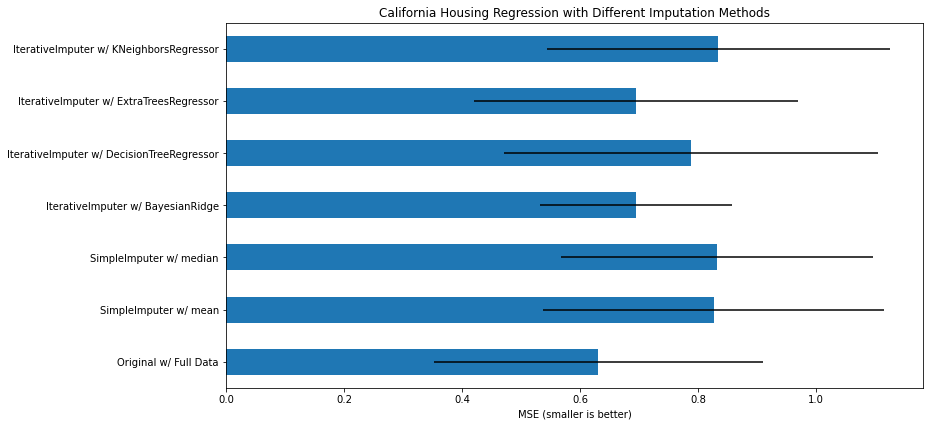

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

N_SPLITS = 5

rng = np.random.RandomState(0)

X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X_full = X_full[::10]
y_full = y_full[::10]
n_samples, n_features = X_full.shape

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    columns=['Full Data']
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
            SimpleImputer(missing_values=np.nan, strategy=strategy),
            br_estimator
            )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
)

# plot california housing results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('California Housing Regression with Different Imputation Methods')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

### 다중 대치법

# 출처:

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>

* 빅데이터분석기사 필기, DataEDU

* [이수안컴퓨터연구소](https://www.youtube.com/c/%EC%9D%B4%EC%88%98%EC%95%88%EC%BB%B4%ED%93%A8%ED%84%B0%EC%97%B0%EA%B5%AC%EC%86%8C)

* [R Friend](https://rfriend.tistory.com/636)

* [sklearn](https://scikit-learn.org/)